Epoch 1: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
Epoch 2: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
Epoch 3: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
Epoch 4: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
Epoch 5: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
Epoch 6: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
Epoch 7: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
Epoch 8: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
Epoch 9: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
Epoch 10: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
Epoch 11: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
Epoch 12: Vanilla Loss = 0.0902, Mini Batch Loss = 0.0857, Stochastic Loss = 0.0865
E

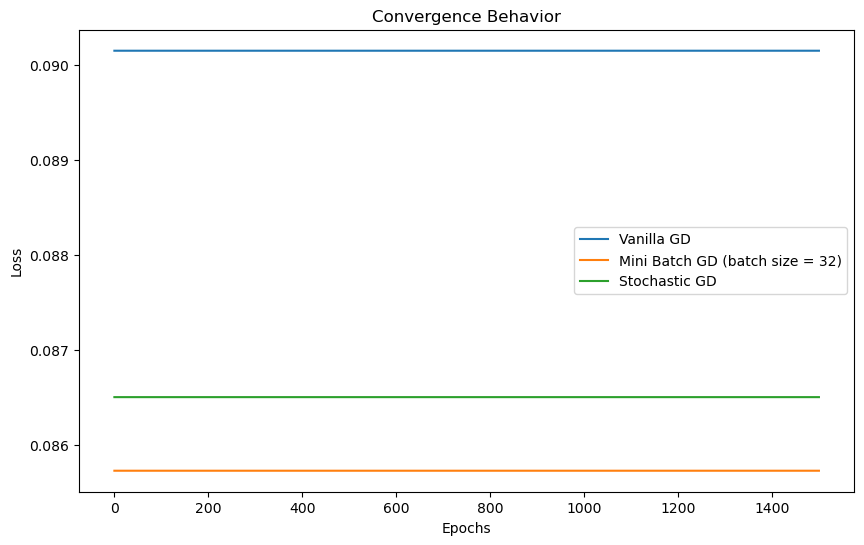

In [1]:
import numpy as np

# Generate synthetic data with 1500 rows and 15 columns
num_samples = 1500
num_features = 15
X = np.random.rand(num_samples, num_features)
y = np.random.rand(num_samples, 1)

# Initialize parameters
theta = np.random.rand(num_features, 1)
learning_rate = 0.01
num_epochs = 1500

# Vanilla Gradient Descent
def vanilla_gradient_descent(X, y, theta, learning_rate, num_epochs):
    for _ in range(num_epochs):
        gradients = X.T @ (X @ theta - y) / num_samples
        theta -= learning_rate * gradients
    return theta

# Mini Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, learning_rate, num_epochs, batch_size):
    num_batches = num_samples // batch_size
    for _ in range(num_epochs):
        for batch_start in range(0, num_samples, batch_size):
            batch_end = batch_start + batch_size
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            gradients = X_batch.T @ (X_batch @ theta - y_batch) / batch_size
            theta -= learning_rate * gradients
    return theta

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, learning_rate, num_epochs):
    for _ in range(num_epochs):
        for i in range(num_samples):
            X_i = X[i:i+1]
            y_i = y[i:i+1]
            gradient = X_i.T @ (X_i @ theta - y_i)
            theta -= learning_rate * gradient
    return theta

# Test the methods
vanilla_theta = vanilla_gradient_descent(X, y, theta.copy(), learning_rate, num_epochs)
batch_size = 32  # Optimal batch size to be determined experimentally
mini_batch_theta = mini_batch_gradient_descent(X, y, theta.copy(), learning_rate, num_epochs, batch_size)
stochastic_theta = stochastic_gradient_descent(X, y, theta.copy(), learning_rate, num_epochs)

# Compare convergence behavior
# You can track the loss function value over epochs and observe how it decreases.

def compute_loss(X, y, theta):
    loss = np.mean((X @ theta - y) ** 2)
    return loss

vanilla_losses = []
mini_batch_losses = []
stochastic_losses = []

for epoch in range(num_epochs):
    vanilla_loss = compute_loss(X, y, vanilla_theta)
    mini_batch_loss = compute_loss(X, y, mini_batch_theta)
    stochastic_loss = compute_loss(X, y, stochastic_theta)
    
    vanilla_losses.append(vanilla_loss)
    mini_batch_losses.append(mini_batch_loss)
    stochastic_losses.append(stochastic_loss)

    print(f"Epoch {epoch+1}: Vanilla Loss = {vanilla_loss:.4f}, Mini Batch Loss = {mini_batch_loss:.4f}, Stochastic Loss = {stochastic_loss:.4f}")

# Plot the convergence behavior
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), vanilla_losses, label='Vanilla GD')
plt.plot(range(num_epochs), mini_batch_losses, label=f'Mini Batch GD (batch size = {batch_size})')
plt.plot(range(num_epochs), stochastic_losses, label='Stochastic GD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence Behavior')
plt.legend()
plt.show()
